Train Accuracy: 0.70 ± 0.00
Validation Accuracy: 0.60 ± 0.00
Acurácia no conjunto de teste: 0.62
Matriz de Confusão:
[[   0   22    0    9]
 [   0 2387   35  381]
 [   0  275   12   54]
 [   0 1071   22  599]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           2       0.64      0.85      0.73      2803
           3       0.17      0.04      0.06       341
           4       0.57      0.35      0.44      1692

    accuracy                           0.62      4867
   macro avg       0.35      0.31      0.31      4867
weighted avg       0.58      0.62      0.58      4867

Kappa: 0.20
Sensibilidade (Recall): [0.         0.85158758 0.03519062 0.35401891]
Especificidade: [0.         0.85158758 0.03519062 0.35401891]
Precisão (PPV): [0.         0.63568575 0.17391304 0.57430489]
VPN: [0.         0.63568575 0.17391304 0.57430489]
F1 Score: [0.         0.72796584 0.05853659 0.43802559]
Precisão Balan

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

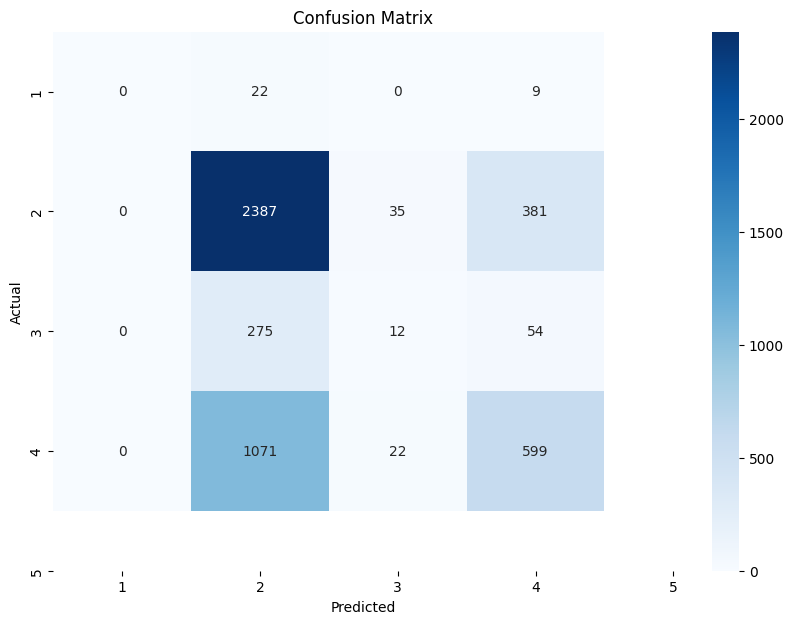

In [2]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")

features = ['RP_001', 'RP_002', 'RP_010', 'RP_007', 'RP_008', 'RP_023', 'RP_005', 'RP_006', 
       'RP_009',  'RP_011', 'RP_012', 'RP_013',  'RP_015', 'RP_010', 'RP_018', 'RP_019', 'RP_014',
       'RP_016', 'RP_017',  'RP_020', 'RP_021', 'RP_022',
        'RP_024', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033',   'RP_036', 
        'RP_039', 'RP_040', 'RP_025',  'RP_046']

# 'RP_035', 'RP_037', 'RP_038', 'RP_034', 'RP_041', 'RP_042', 'RP_044', 'RP_045' 'RP_048' 'RP_047', 'RP_049', 'RP_050'

X = gnetDf[features]
y = gnetDf['RP_045']


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criar o modelo k-NN com os parâmetros especificados
model = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
# report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])
report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Train Accuracy: 0.93 ± 0.00
Validation Accuracy: 0.93 ± 0.00
Acurácia no conjunto de teste: 0.92
Matriz de Confusão:
[[4488   22    0]
 [ 280   12    0]
 [  61    4    0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96      4510
           2       0.32      0.04      0.07       292
           3       0.00      0.00      0.00        65

    accuracy                           0.92      4867
   macro avg       0.42      0.35      0.34      4867
weighted avg       0.88      0.92      0.89      4867

Kappa: 0.06
Sensibilidade (Recall): [0.99512195 0.04109589 0.        ]
Especificidade: [0.99512195 0.04109589 0.        ]
Precisão (PPV): [0.92938497 0.31578947 0.        ]
VPN: [0.92938497 0.31578947 0.        ]
F1 Score: [0.96113074 0.07272727 0.        ]
Precisão Balanceada: 0.35
Prevalência: 0.09
Taxa de Detecção: 0.35
Intervalo de Confiança (95%): (0.9171760601489362, 0.9320123516036835)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

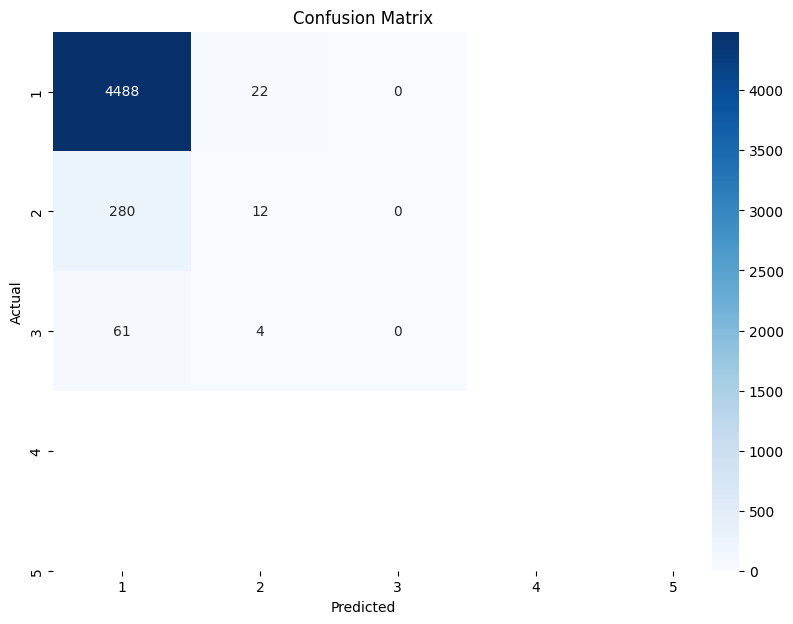

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")

features = ['RP_001', 'RP_002', 'RP_010', 'RP_007', 'RP_008', 'RP_023', 'RP_005', 'RP_006', 
       'RP_009',  'RP_011', 'RP_012', 'RP_013',  'RP_015', 'RP_010', 'RP_018', 'RP_019', 'RP_014',
       'RP_016', 'RP_017',  'RP_020', 'RP_021', 'RP_022',
        'RP_024', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033',   'RP_036', 
        'RP_039', 'RP_040', 'RP_025',  'RP_046']

# 'RP_035', 'RP_037', 'RP_038', 'RP_034', 'RP_041', 'RP_042', 'RP_044', 'RP_045' 'RP_048' 'RP_047', 'RP_049', 'RP_050'

X = gnetDf[features]
y = gnetDf['RP_045']



# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criar o modelo k-NN com os parâmetros especificados
model = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
# report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])
report = classification_report(y_test, y_pred, target_names=['1', '2', '3'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
